# Support Vector Machine

In [25]:
from sklearn import datasets

from sklearn.datasets import load_iris                                 # Import the dataset
from sklearn import tree                                               # Visualize the decision tree
from sklearn.svm import SVC                                            # Import Support Vector Machine Classifier
from sklearn.preprocessing import LabelEncoder, StandardScaler         # Encoding categorical data
from sklearn.model_selection import train_test_split                   # Splitting dataset into traning and testing sets
from sklearn.metrics import classification_report, confusion_matrix    # Evaluting the performance of the classifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV

# More performance metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svc",  SVC(C = 0.1, kernel='linear', gamma='auto', probability=True)),
    ])

In [15]:
df = pd.read_csv('heart_disease.csv')

cat_features = df.select_dtypes(include = "object").columns

#Label Encoding for object to numeric conversion

le = LabelEncoder()

for col in cat_features:
    df[col] = le.fit_transform(df[col].astype(str))

In [16]:
# Create class(y) and features(X) from the dataset

y = df['HeartDisease']
X = df.drop('HeartDisease',axis=1)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

svm = SVC()
svm_clf.fit(X_train, y_train)

#svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[31 15]
 [11 23]]
              precision    recall  f1-score   support

           0       0.74      0.67      0.70        46
           1       0.61      0.68      0.64        34

    accuracy                           0.68        80
   macro avg       0.67      0.68      0.67        80
weighted avg       0.68      0.68      0.68        80



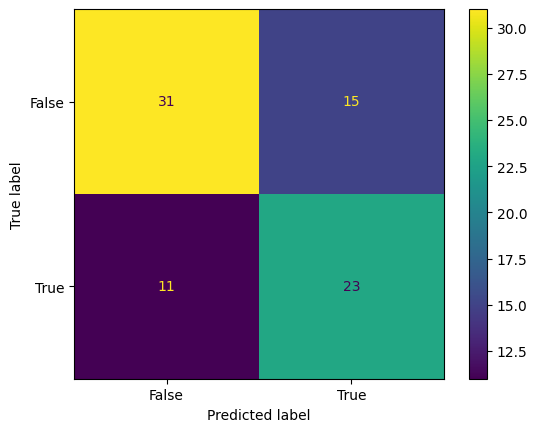

In [18]:
cfm = confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cfm, display_labels = [False, True])

cm_display.plot()
plt.show()

Accuracy: 0.675000
Precision: 0.605263
Recall: 0.676471
F1 score: 0.638889
ROC AUC: 0.716752


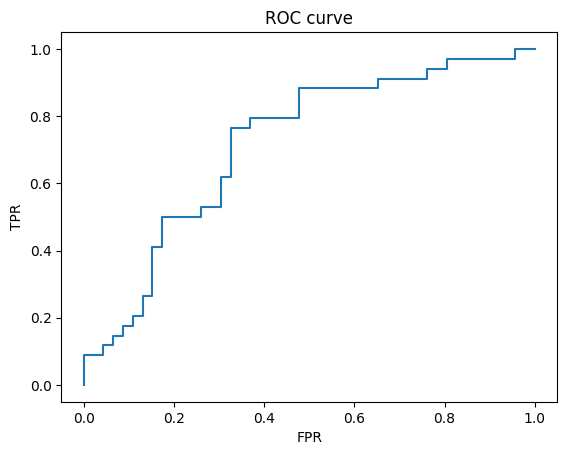

In [19]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)
 
    
# ROC AUC
y_hat = svm_clf.predict_proba(X_test)
auc = roc_auc_score(y_test, y_hat[:,1])
print('ROC AUC: %f' % auc)

fpr, tpr, _ = metrics.roc_curve(y_test, y_hat[:,1])

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [37]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

In [38]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)

grid.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=  18.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   9.2s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   8.8s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=  12.9s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=  15.2s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

[CV] END ...................C=1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=10, gamma=1, kernel=poly; total time=  17.7s
[CV] END .........................C=10, gamma=1, kernel=poly; total time=   9.1s
[CV] END .........................C=10, gamma=1, kernel=poly; total time=   8.8s
[CV] END .........................C=10, gamma=1, kernel=poly; total time=  13.3s
[CV] END .........................C=10, gamma=1, kernel=poly; total time=  15.4s
[CV] END ......................C=10, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ...................

[CV] END ....................C=100, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END .................C=100, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END .................C=100, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END .................C=100, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END .................C=100, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END .................C=100, gamma=0.001, kernel=sigmoid; total time=   0.0s


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [40]:
final_model = grid_search.best_estimator_
train_predictions = final_model.predict(X_train)
test_predictions = final_model.predict(X_test)

print('Train Score:', accuracy_score(train_predictions, y_train)) # .99
print('Test Score:', accuracy_score(test_predictions, y_test)) # .8

Train Score: 0.840625
Test Score: 0.6625


In [ ]:
grid.best_params_